# Data-Scientist  Ahmet Zafer SAĞLIK

 Car Price Prediction by using ML Regression models Audi Sample.

# Introduction
The aim of the project is to predict the price of used cars in UK for "Audi" brand with regression models (Support Vector, Multinomial Linear and Random forest Regressions) based on the independet variables described below.
The R^2 of each model will be compared to each other and at the end optimization will be appplied to the best fit model.  


# Import Libraries

In [ ]:
#All the libraries needed for the further steps are written down here.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from platform import python_version
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#importing libraries

In [ ]:
print(python_version()) # just checked the version of the Python. 

3.6.3


# Import Dataset - Read Csv

In [ ]:
dataset = pd.read_csv('audi.csv')
X = dataset.iloc[:, [0,1,3,4,5,6,7,8]]
y = dataset.iloc[:, 2].values
y = y.reshape(len(y),1)
#reading cvs

In [ ]:
#Check the nummers of the columns and rows. 
dataset.shape

(10668, 9)

In [ ]:
# to see the content of the data. 
dataset.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [ ]:
# see the independent variables of the dataset. 
dataset.iloc[:, [0,1,3,4,5,6,7,8]].head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,Manual,1998,Petrol,145,49.6,1.0


In [ ]:
#to see if there is any null value in our dataset. 
dataset.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
#cross-check of cells
dataset.notnull().sum()

model           10668
year            10668
price           10668
transmission    10668
mileage         10668
fuelType        10668
tax             10668
mpg             10668
engineSize      10668
dtype: int64

In [ ]:
#better understand the data and to see some statistical values. 
dataset.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [ ]:
X.head(3)

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,Manual,29946,Petrol,30,55.4,1.4


## Data Transformation 

In [ ]:
X['model'] = X['model'].astype('category')
X['transmission'] = X['transmission'].astype('category')
X['fuelType']=X['fuelType'].astype('category')

X = pd.get_dummies(X)
#catogorised variables

In [ ]:
X.head(3)

,year,mileage,tax,mpg,engineSize,model_ A1,model_ A2,model_ A3,model_ A4,model_ A5,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,2017,15735,150,55.4,1.4,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2016,36203,20,64.2,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2016,29946,30,55.4,1.4,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


## Data Visualization

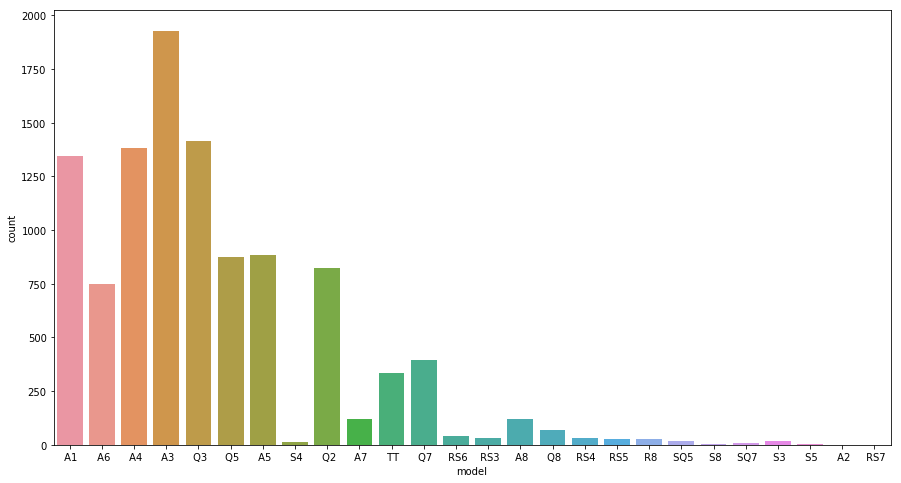

In [ ]:
#breakdown of the car models are visualized.
plt.figure(figsize=(15,8))
sns.countplot(x='model',data=dataset)  

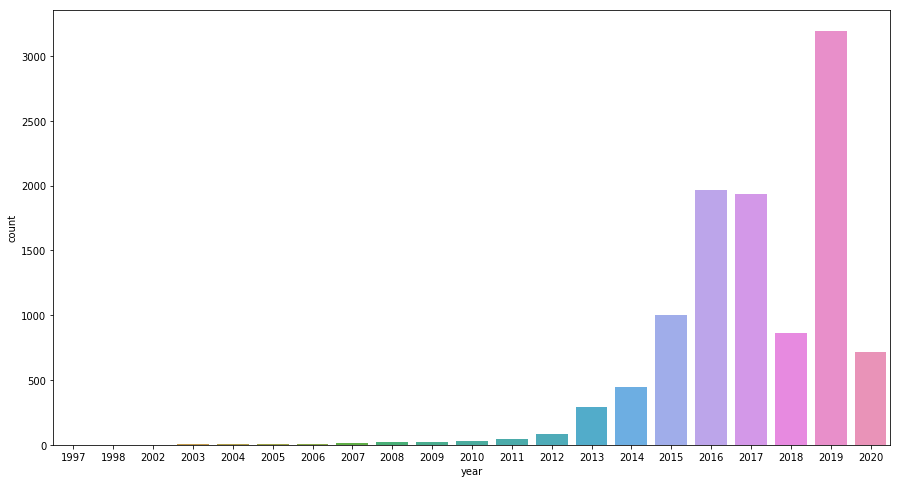

In [ ]:
#breakdown of the "production year"is visualized. 
plt.figure(figsize=(15,8))
sns.countplot(x='year',data=dataset)

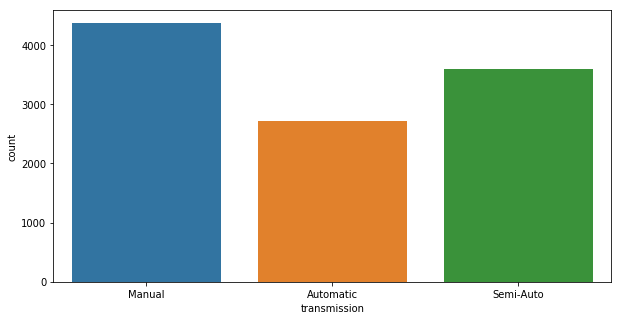

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='transmission',data=dataset)

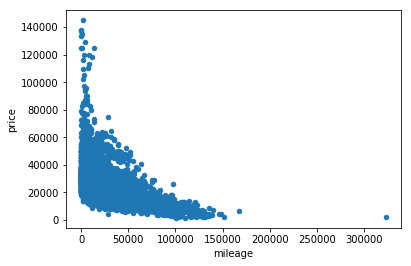

In [ ]:
#change in the price based on the mileage of the car is visualized. 
plt.figure(figsize=(15,8)) 
dataset.plot.scatter(x="mileage", y="price")


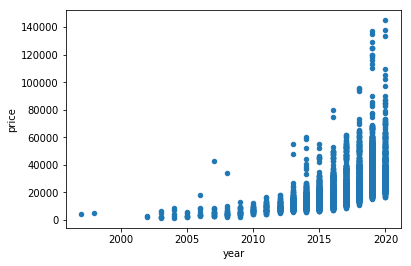

In [ ]:
#change in the price based on the "year" of the car is visualized.
plt.figure(figsize=(10,5)) 
dataset.plot.scatter(x="year", y="price")


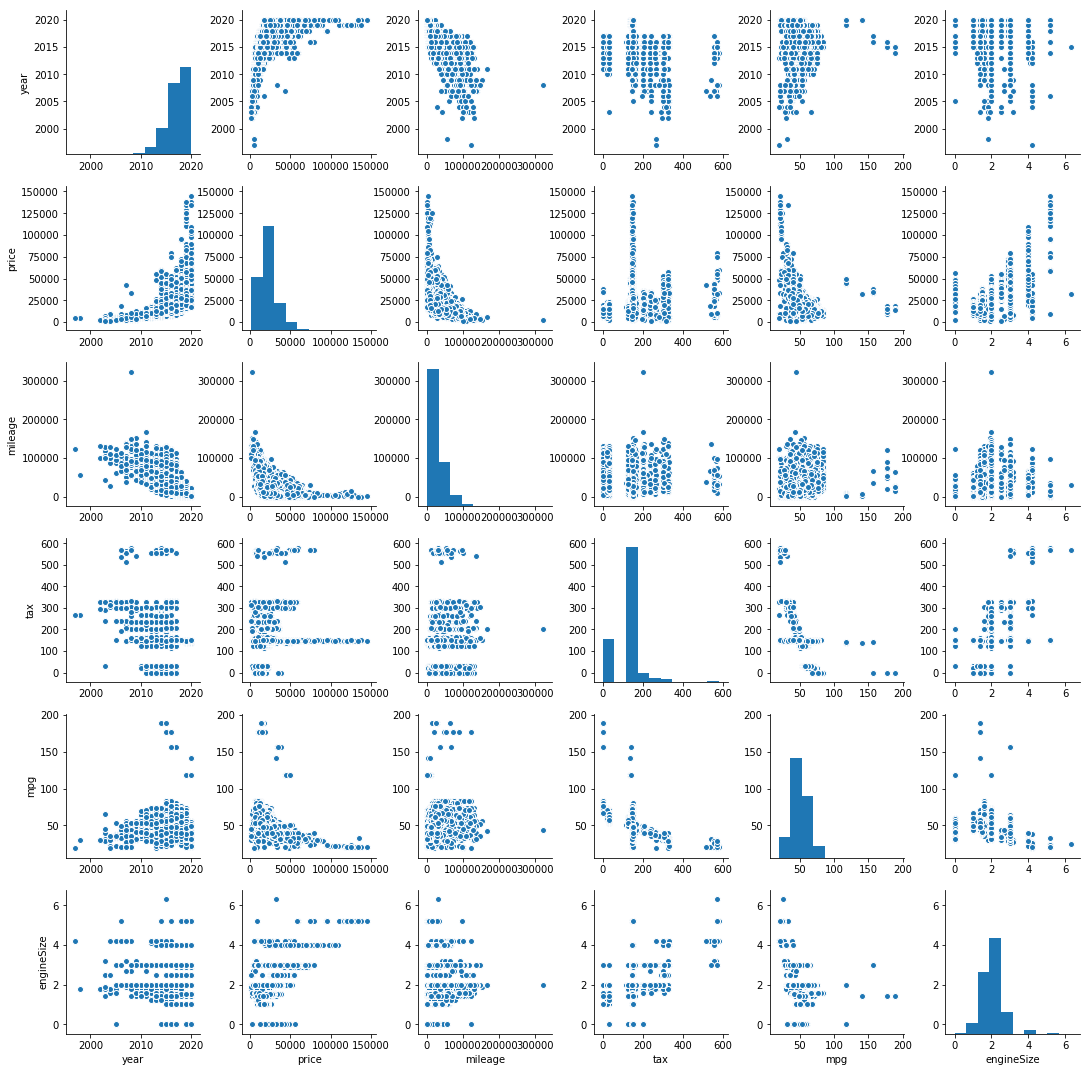

In [ ]:
sns.pairplot(dataset)

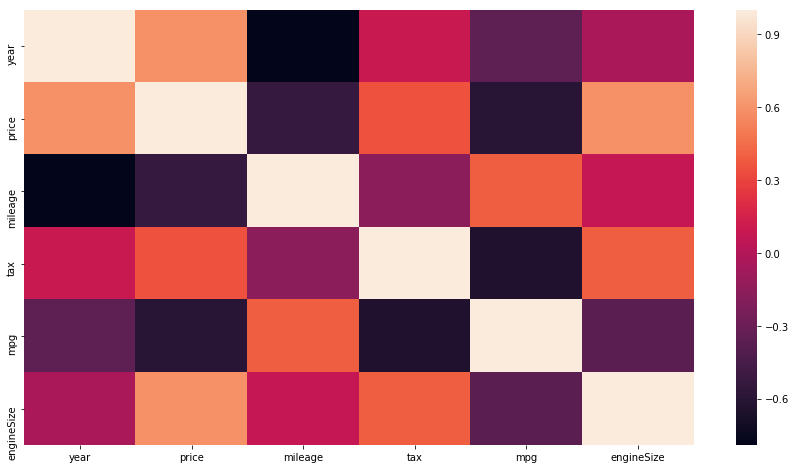

In [ ]:
#dataset correlation heatmeap is visualised. 
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr())

# Split Test and Train Data

In [ ]:
X[:1]

,year,mileage,tax,mpg,engineSize,model_ A1,model_ A2,model_ A3,model_ A4,model_ A5,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,2017,15735,150,55.4,1.4,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
#spliting test and train

In [ ]:
y_train

array([[19750],
       [38995],
       [38990],
       ..., 
       [26000],
       [16450],
       [35895]], dtype=int64)

In [ ]:
print(X_train)

       year  mileage  tax   mpg  engineSize  model_ A1  model_ A2  model_ A3  \
10002  2015    23787  205  40.4         2.0          0          0          0   
617    2018     6850  145  38.2         3.0          0          0          0   
7228   2019     4860  145  38.7         2.0          0          0          0   
7925   2014    57000  200  48.7         3.0          0          0          0   
5834   2013    67000  125  60.1         2.0          0          0          0   
5340   2019     9000  145  33.2         3.0          0          0          0   
1145   2020     4444  145  39.2         1.5          0          0          0   
3747   2019     4234  145  54.3         1.6          0          0          1   
8681   2020      875  150  33.2         3.0          0          0          0   
6702   2017    32618   20  67.3         2.0          0          0          1   
5291   2016    36538  200  47.1         2.0          0          0          0   
6495   2020     3000  145  44.1         

# Feature Scalling

In [ ]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
#future scaling

In [ ]:
X_train

array([[-0.96591386, -0.04661069,  1.18513129, ..., -1.04531933,
        -0.05198447,  1.05098157],
       [ 0.41785463, -0.76542265,  0.28753988, ...,  0.95664547,
        -0.05198447, -0.95149147],
       [ 0.87911079, -0.84987891,  0.28753988, ..., -1.04531933,
        -0.05198447,  1.05098157],
       ..., 
       [-0.5046577 ,  0.03419571,  1.11033201, ...,  0.95664547,
        -0.05198447, -0.95149147],
       [-0.04340153,  0.54373437,  0.36233916, ...,  0.95664547,
        -0.05198447, -0.95149147],
       [ 0.87911079, -0.97125827,  0.28753988, ...,  0.95664547,
        -0.05198447, -0.95149147]])

# Model Train

In [ ]:
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf')
regressor_svr.fit(X_train, y_train)
#putting svm regression

from sklearn.linear_model import LinearRegression
regressor_multi = LinearRegression()
regressor_multi.fit(X_train, y_train)

from sklearn.ensemble import RandomForestRegressor
regressor_rand = RandomForestRegressor(n_estimators = 10, random_state = 0) #deterministic aproach random seed
regressor_rand.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

# Comparing Prediction With Test

In [ ]:
#Svr Method
y_pred_svr = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_test)))
svr_reshape_test=y_test.reshape(len(y_test),1)
svr_reshape_pred=y_pred_svr.reshape(len(y_pred_svr),1)
reshape=(svr_reshape_pred, svr_reshape_test)
print(np.concatenate(reshape,1))
#see both results left column is prediction,right columns are the real results

[[ 21532.20599055  19000.        ]
 [ 17087.89592576  18799.        ]
 [ 22035.95529542  26664.        ]
 ..., 
 [ 18044.74467573  17505.        ]
 [ 29774.26488679  28500.        ]
 [ 54933.94062696  54000.        ]]


In [ ]:
#Multinomial Method
y_pred_multi = sc_y.inverse_transform(regressor_multi.predict(sc_X.transform(X_test)))
multi_reshape_test=y_test.reshape(len(y_test),1)
multi_reshape_pred=y_pred_multi.reshape(len(y_pred_multi),1)
reshape=(multi_reshape_pred, multi_reshape_test)
print(np.concatenate(reshape,1))

[[ 23512.48622251  19000.        ]
 [ 19031.34720499  18799.        ]
 [ 24165.21933226  26664.        ]
 ..., 
 [ 18547.99244408  17505.        ]
 [ 31001.13042518  28500.        ]
 [ 59456.80363397  54000.        ]]


In [ ]:
#random - desicion Method
y_pred_rand = sc_y.inverse_transform(regressor_rand.predict(sc_X.transform(X_test)))
rand_reshape_test=y_test.reshape(len(y_test),1)
rand_reshape_pred=y_pred_rand.reshape(len(y_pred_rand),1)
reshape=(rand_reshape_pred, multi_reshape_test)
print(np.concatenate(reshape,1))

[[ 19030.1         19000.        ]
 [ 17396.5         18799.        ]
 [ 23362.          26664.        ]
 ..., 
 [ 20097.05        17505.        ]
 [ 31594.          28500.        ]
 [ 54698.33333333  54000.        ]]


# Results and Model Selection

In [ ]:
#Svr result
svr_rslt=r2_score(y_test, y_pred_svr)
print(svr_rslt)
#r squared score

0.92439225773


In [ ]:
#Multinomial result
mult_rslt=r2_score(y_test, y_pred_multi)
print(mult_rslt)
#r squared score

0.886034797601


In [ ]:
#Random result
rand_rslt=r2_score(y_test, y_pred_rand)
print(rand_rslt)
#r squared score

0.948197697428


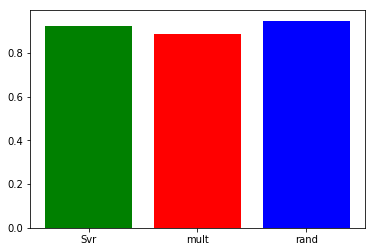

In [ ]:
## Visualization of the Test Results. 
y=['Svr','mult','rand']
x=[svr_rslt,mult_rslt,rand_rslt]

plt.bar(y,x, color=['green', 'red', 'blue']) ## rand (blue) has the most explanatory power. Highest R^2. 
plt.show()

# Optimization

In [ ]:
#The algorithm is re-arranged in order to optimise the best prediction.

regressor_rand_opt = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor_rand_opt.fit(X_train, y_train)
y_pred_rand_opt = sc_y.inverse_transform(regressor_rand_opt.predict(sc_X.transform(X_test)))

opt_rand_rslt=r2_score(y_test, y_pred_rand_opt)
print(opt_rand_rslt)
#The number of the estimators are increased in order to increase R^2 since the algorithm is taking the mean of all trees' predictions. After 100, the adjusted R^2 stays stable and doesnt change.  

0.95264140927


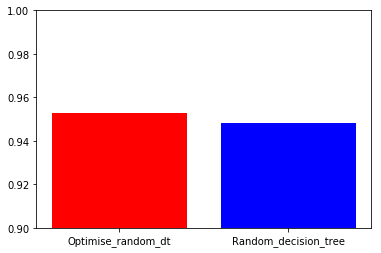

In [ ]:
#Visualization of the best result and optimazited version. 
y=['Random_decision_tree','Optimise_random_dt']
x=[rand_rslt,opt_rand_rslt]
plt.ylim((0.9, 1))
plt.bar(y,x, color=['blue', 'red'])
plt.show()